## Time Series Forecasting using dataset "Bitcoin Historical Data"

The goal of this project is to develop a predictive model for Bitcoin closing prices using historical 1-minute data, comparing statistical and machine learning approaches to identify trends and volatility patterns.

In [2]:
# Importing necessary libraries 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"data\bitcoin_historical_data.csv")
data.tail()

,Timestamp,Open,High,Low,Close,Volume
7337913,1.765756e+09,88252.0,88252.0,88221.0,88221.0,0.478176
7337914,1.765756e+09,88238.0,88238.0,88215.0,88230.0,0.913307
7337915,1.765757e+09,88235.0,88243.0,88143.0,88143.0,1.793743
7337916,1.765757e+09,88125.0,88192.0,88125.0,88162.0,0.496879
7337917,1.765757e+09,88162.0,88164.0,88150.0,88160.0,1.075660


In [4]:
# Inspecting the data
data.info()
data.describe()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337918 entries, 0 to 7337917
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 335.9 MB


Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

The data has 7337918 rows and 5 columns. The columns include:

- `Timestamp`: The exact date and time the observation was recorded. 
-  `Open`: The first traded price of Bitcoin at that time interval. 
- `High`: The highest price Bitcoin reached during that time interval.   
- `Low`: The lowest price Bitcoin reached during that time interval. 
- `Close`: The last traded price at the end of the interval. 
- `Volume`: The amount of Bitcoin traded during the interval. 

The data has no null values and missing values. 

In [5]:
# Converting the timestamps into datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data["Timestamp"]

0         1970-01-01 00:00:01.325412060
1         1970-01-01 00:00:01.325412120
2         1970-01-01 00:00:01.325412180
3         1970-01-01 00:00:01.325412240
4         1970-01-01 00:00:01.325412300
                       ...             
7337913   1970-01-01 00:00:01.765756440
7337914   1970-01-01 00:00:01.765756500
7337915   1970-01-01 00:00:01.765756560
7337916   1970-01-01 00:00:01.765756620
7337917   1970-01-01 00:00:01.765756680
Name: Timestamp, Length: 7337918, dtype: datetime64[ns]

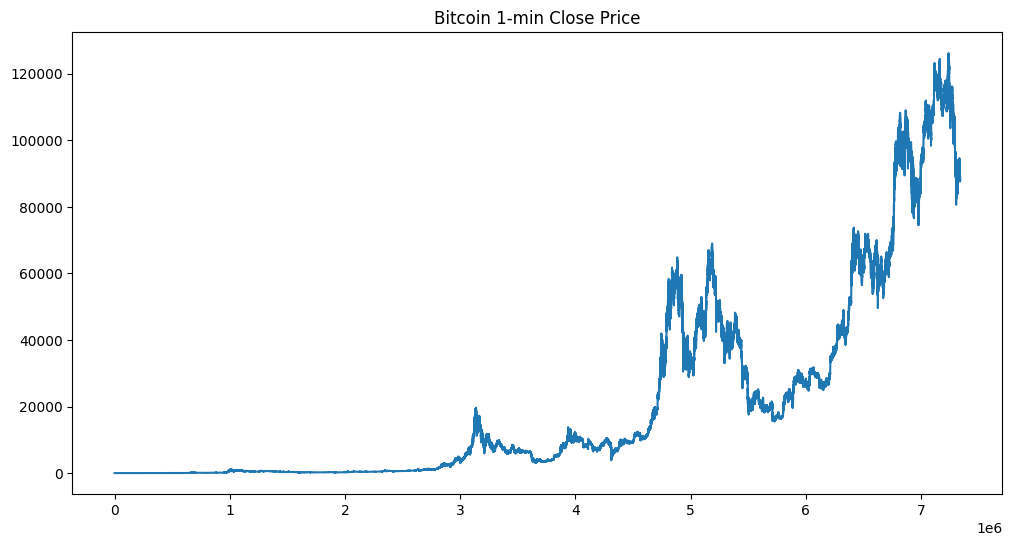

In [6]:
# Plotting the data to show the trend
plt.figure(figsize=(12, 6))
data['Close'].plot(figsize=(12,6), title="Bitcoin 1-min Close Price")
plt.show()

The visualization of Bitcoin’s 1-minute close price over the recorded period shows an initial phase of low, stable prices, followed by multiple sharp increases representing boom periods. The series exhibits strong upward trend, high volatility, and non-constant variance, with extreme spikes reflecting sudden market activity. Such characteristics suggest the need for resampling, trend-stationarity checks, and careful modeling in any forecasting analysis.

### Data Preparation 